In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')  # enable import from src/

In [9]:
import json
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from src.problem import get_model_scip

# New Instances

In [16]:
instances_fps = list(Path('../data/raw/').glob('97_*.json'))

instance_fp = instances_fps[0]

with open(instance_fp) as f:
    instance = json.load(f)
instance.keys()

dict_keys(['subs', 'jobs', 'T', 'power_use', 'power_resource', 'min_cpu_time', 'max_cpu_time', 'min_job_period', 'max_job_period', 'min_startup', 'max_startup', 'priority', 'win_min', 'win_max'])

In [17]:
instance['win_max']

[97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 90,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97]

In [18]:
instance['T']

97

In [19]:
model = get_model_scip(instance, new_ineq=True)
{var.name.split('(')[0] for var in model.getVars()}

{'b', 'i', 'phi', 'soc', 'x'}

# Solutions

In [20]:
instance_fp

PosixPath('../data/raw/97_24_5.json')

In [22]:
sols_dir = Path('../data/interim/')
sol_fpath = sols_dir/instance_fp.name.replace('.json', '_opt.npz')
sol_fpath.exists()

True

In [28]:
sol_fpath.name.split('_')

['97', '9', '19', 'opt.npz']

In [30]:
sols_fpaths = sols_dir.glob('97_*_opt.npz')

sols = list()
for sol_fpath in sols_fpaths:
    _, size, instance_id, _ = sol_fpath.name.split('_')
    size = int(size)
    instance_id = int(instance_id)
    
    sol_npz = np.load(sol_fpath)
    obj, gap, runtime, _ = sol_npz['arr_0'], sol_npz['arr_1'], sol_npz['arr_2'], sol_npz['arr_3']
    sols.append(dict(
        id=instance_id,
        size=size,
        obj=obj,
        gap=gap,
        runtime=runtime,
    ))

df = pd.DataFrame(sols)
df.head()

,id,size,obj,gap,runtime
0,40,22,12758.0,0.00015676438313215238,300.0482838153839
1,77,22,13560.0,7.374631268436578e-05,14.80199384689331
2,88,9,3836.0,0.0,0.25761890411376953
3,49,9,3757.0,0.0,4.174372911453247
4,62,18,10983.0,9.104980424292088e-05,77.54949402809143


<AxesSubplot: >

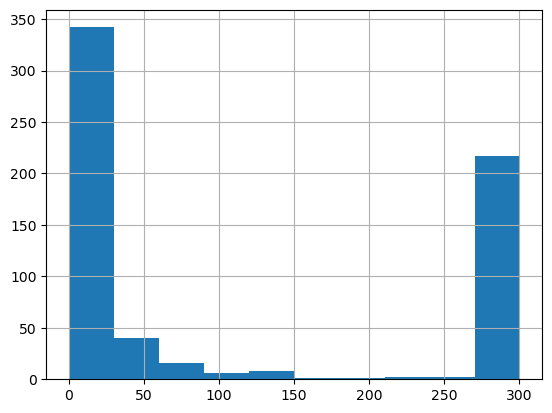

In [31]:
df['runtime'].hist()

In [34]:
df[df['runtime'] > 200]

,id,size,obj,gap,runtime
0,40,22,12758.0,0.00015676438313215238,300.0482838153839
6,38,20,7473.0,0.00026763013515321824,300.04585790634155
8,87,24,15385.0,0.00012999675008124796,300.0385880470276
23,0,18,7302.0,0.0001369487811558477,300.01457715034485
27,87,20,9687.0,0.00020646226902033653,300.10221695899963
...,...,...,...,...,...
618,11,20,10989.0,0.000364000364000364,300.07042503356934
621,67,13,6643.0,0.0004516031913292187,300.0128231048584
623,93,24,12287.0,0.0006510946528851632,300.020302772522
626,86,13,5864.0,0.00017053206002728513,300.01466608047485


In [23]:
sol_npz = np.load(sol_fpath)
obj, gap, runtime, sol = sol_npz['arr_0'], sol_npz['arr_1'], sol_npz['arr_2'], sol_npz['arr_3']
gap

array(0.00012642)

In [ ]:
n_sols = list()
objs_range = list()
for sol in solutions.values():
    n_sols.append(len(sol['objs']))
    objs_range.append(max(sol['objs']) - min(sol['objs']))

plt.hist(n_sols, bins=50, weights=[1/len(n_sols),] * len(n_sols), log=False)
plt.title('# of solutions found')
plt.show()

plt.hist(objs_range, bins=50, weights=[1/len(n_sols),] * len(n_sols), log=False)
plt.title('objective difference between the best and the worst solutions')
plt.show()

# Test instances

In [ ]:
def flatten(l):
    if not isinstance(l, list):
        return l

    l_ = list()
    for l_i in l:
        if isinstance(l_i, list):
            l_i = flatten(l_i)
        else:
            l_i = [l_i, ]

        l_ += l_i  # concatenate

    return l_

In [ ]:
with open('../data/raw/test_instances/290_9.json') as f:
    instance = json.load(f)

instance['min_cpu_time']

In [ ]:
instance['min_periodo_job']

In [ ]:
test_instances = list(Path('../data/raw/test_instances').glob('*_*.json'))

instances_values = dict()
for instance_fp in test_instances:
    with open(instance_fp) as f:
        instance = json.load(f)

    for k, v in instance.items():
        v = flatten(v)
        try:
            instances_values[k].append(v)
        except KeyError:
            instances_values[k] = [v,]

# instances_values['win_min'] = [max(min_s) for min_s in instances_values['win_min']]
# instances_values['win_max'] = [min(max_s) for max_s in instances_values['win_max']]
# instances_values['min_cpu_time'] = [max(min_s) for min_s in instances_values['min_cpu_time']]
# instances_values['max_cpu_time'] = [max(max_s) for max_s in instances_values['max_cpu_time']]
# instances_values['min_periodo_job'] = [max(min_s) for min_s in instances_values['min_periodo_job']]
# instances_values['max_periodo_job'] = [max(max_s) for max_s in instances_values['max_periodo_job']]
# instances_values['min_startup'] = [max(min_s) for min_s in instances_values['min_startup']]
# instances_values['max_startup'] = [max(max_s) for max_s in instances_values['max_startup']]

instances_values.pop('recurso_p')
instances_values.pop('priority')
instances_values.pop('uso_p')

flat_instances_values = {k: list() for k in instances_values.keys()}
for i in range(len(test_instances)):
    for j in range(instances_values['jobs'][i]):
        for k in ['min_startup', 'max_startup', 'min_periodo_job', 'max_periodo_job', 'win_min', 'win_max', 'min_cpu_time', 'max_cpu_time']:
            flat_instances_values[k].append(instances_values[k][i][j])
        
        flat_instances_values['jobs'].append(instances_values['jobs'][i])
        flat_instances_values['T'].append(instances_values['T'][i])

df = pd.DataFrame(flat_instances_values)
df

In [ ]:
k = 'win_max'
print(k)
df.hist(column=k, by='T', figsize=(10,10))
plt.suptitle(k)
plt.show()

s = df.groupby('T')[k].quantile(.1)
print(s)
print(max(s.values / s.index))
print(min(s.index - s.values))

In [ ]:
test_instances = list(Path('../data/raw/test_instances').glob('*_*.json'))

instances_values = dict()
for instance_fp in test_instances:
    with open(instance_fp) as f:
        instance = json.load(f)

    # if instance['jobs'] < 20:
    #     continue

    for k, v in instance.items():
        v = flatten(v)
        try:
            instances_values[k].append(v)
        except KeyError:
            instances_values[k] = [v,]

min_cpu_times = [np.array(m) for m in instances_values['min_cpu_time']]
min_periodo_job = [np.array(m) for m in instances_values['min_periodo_job']]

for i in range(len(min_cpu_times)):
    mct = min_cpu_times[i]
    mpj = min_periodo_job[i]

    if any((mpj - mct) < 0):
        print(test_instances[i])

In [ ]:
with open('../data/raw/test_instances/194_9.json') as f:
    instance = json.load(f)

instance['min_cpu_time']

In [ ]:
instance['min_periodo_job']

In [ ]:
mct - mpj

In [ ]:
test_instances = list(Path('../data/raw/test_instances').glob('*_*.json'))

instances_values = dict()
for instance_fp in test_instances:
    with open(instance_fp) as f:
        instance = json.load(f)

    # if instance['jobs'] < 20:
    #     continue

    for k, v in instance.items():
        v = flatten(v)
        try:
            instances_values[k].append(v)
        except KeyError:
            instances_values[k] = [v,]

for k in instances_values.keys():
    try:
        instances_values[k] = np.concatenate([np.array(v) for v in instances_values[k]])
    except ValueError:
        pass

keys = [
    'T',
    'priority',
    'jobs',
    'recurso_p',
    'uso_p',
    'min_startup',
    'max_startup',
    'min_periodo_job',
    'max_periodo_job',
    'win_min',
    'win_max',
    'min_cpu_time',
    'max_cpu_time',
]
for k in keys:
    v = instances_values[k]
    plt.hist(v, bins=50)
    plt.title(f"{k} [{min(v):.2f},{max(v):.2f}]")
    plt.show()

In [ ]:
instances_values = dict()
for instance_fp in Path('../data/raw/').glob('*.json'):
    with open(instance_fp) as f:
        instance = json.load(f)

    for k, v in instance.items():
        v = flatten(v)
        try:
            instances_values[k].append(v)
        except KeyError:
            instances_values[k] = [v,]

for k in instances_values.keys():
    try:
        instances_values[k] = np.concatenate([np.array(v) for v in instances_values[k]])
    except ValueError:
        pass

for k, v in instances_values.items():
    plt.hist(v, bins=50)
    plt.title(f"{k} [{min(v):.2f},{max(v):.2f}]")
    plt.show()

In [ ]:
instances_values = dict()
for instance_fp in Path('../data/raw/').glob('*.json'):
    with open(instance_fp) as f:
        instance = json.load(f)

    for k, v in instance.items():
        try:
            instances_values[k].append(v)
        except KeyError:
            instances_values[k] = [v,]

for k in instances_values.keys():
    try:
        instances_values[k] = np.concatenate([np.array(v) for v in instances_values[k]])
    except ValueError:
        pass

for k, v in instances_values.items():
    plt.hist(v, bins=50)
    plt.title(f"{k} [{min(v):.2f},{max(v):.2f}]")
    plt.show()

# Generated Instances

In [3]:
ns = dict()
for t in [97, 120, 125, 154, 170, 194, 291]:
    for j in [9, 13, 18, 20, 22, 24]:
        ns[t,j] = len(list(Path('../data/raw/').glob('%d_%d_*.json' % (t, j))))
ns

{(97, 9): 109,
 (97, 13): 107,
 (97, 18): 104,
 (97, 20): 107,
 (97, 22): 103,
 (97, 24): 105,
 (120, 9): 106,
 (120, 13): 107,
 (120, 18): 104,
 (120, 20): 100,
 (120, 22): 100,
 (120, 24): 100,
 (125, 9): 102,
 (125, 13): 106,
 (125, 18): 102,
 (125, 20): 102,
 (125, 22): 100,
 (125, 24): 100,
 (154, 9): 100,
 (154, 13): 102,
 (154, 18): 100,
 (154, 20): 9,
 (154, 22): 0,
 (154, 24): 0,
 (170, 9): 56,
 (170, 13): 0,
 (170, 18): 0,
 (170, 20): 0,
 (170, 22): 0,
 (170, 24): 0,
 (194, 9): 100,
 (194, 13): 0,
 (194, 18): 0,
 (194, 20): 0,
 (194, 22): 0,
 (194, 24): 0,
 (291, 9): 100,
 (291, 13): 0,
 (291, 18): 0,
 (291, 20): 0,
 (291, 22): 0,
 (291, 24): 0}

In [ ]:
npz = np.load('../data/interim/97_13_30_sols.npz')

sols, objs = npz['arr_0'], npz['arr_1']

sols.shape, objs.shape

In [ ]:
with open('../data/raw/97_13_30.json') as f:
    instance = json.load(f)

instance

In [ ]:
m = get_model(instance)

m.getVars()[-100:]

## Create hdf5

In [ ]:
import h5py

In [ ]:
h5_file = h5py.File('test.hdf5', 'w')

In [ ]:
instances_fps = list(Path('../data/raw/').glob('97*.json'))

instances_sizes = {tuple(map(int, f.name.split('_')[:2])) for f in instances_fps}
instances_sizes = np.array([np.array(inst_size) for inst_size in instances_sizes])

h5_file.require_dataset('instances', instances_sizes.shape, instances_sizes.dtype, exact=True)
h5_file['instances'][:] = instances_sizes
h5_file['instances'][:]

In [ ]:
params = [
    'power_use',
    'min_cpu_time',
    'max_cpu_time',
    'min_job_period',
    'max_job_period',
    'min_startup',
    'max_startup',
    'priority',
    'win_min',
    'win_max'
]
for instance_fp in instances_fps:
    with open(instance_fp) as f:
        instance = json.load(f)

    sol_npz = np.load(Path('../data/interim/')/instance_fp.name.replace('.json', '_sols.npz'))
    sols, objs = sol_npz['arr_0'], sol_npz['arr_1']

    t, j, i = map(int, instance_fp.name[:-len('.json')].split('_')[:3])

    t_group = h5_file.require_group(str(t))
    group = t_group.require_group(str(j))

    if not 'i' in group.keys():
        group.create_dataset('i', (0,), '<i8', maxshape=(200,))
    group['i'].resize(len(group['i']) + 1, 0)
    group['i'][-1] = i

    if not 'power_resource' in group.keys():
        group.create_dataset('power_resource', (0,t), 'float64', maxshape=(200,t))
    group['power_resource'].resize(len(group['power_resource']) + 1, 0)
    group['power_resource'][-1] = instance['power_resource']

    if not 'jobs_params' in group.keys():
        group.create_dataset('jobs_params', (0,10*j), 'float64', maxshape=(200,10*j))
        group['jobs_params'].attrs['params'] = params
    group['jobs_params'].resize(len(group['jobs_params']) + 1, 0)

    jobs_params = list()
    for p in params:
        jobs_params += instance[p]
    group['jobs_params'][-1] = jobs_params
    break

In [ ]:
h5_file.close()
!rm test.hdf5